In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


Movies Dataset Statistics:
                                            movieid  \
count                                        143258   
unique                                       126404   
top     escape_the_terminator_tyler_durden_astonish   
freq                                            367   
mean                                            NaN   
std                                             NaN   
min                                             NaN   
25%                                             NaN   
50%                                             NaN   
75%                                             NaN   
max                                             NaN   

                                              title  audienceScore rating  \
count                                        143258   73248.000000  13991   
unique                                       126404            NaN     10   
top     Escape The Terminator Tyler Durden Astonish            NaN      R   
freq

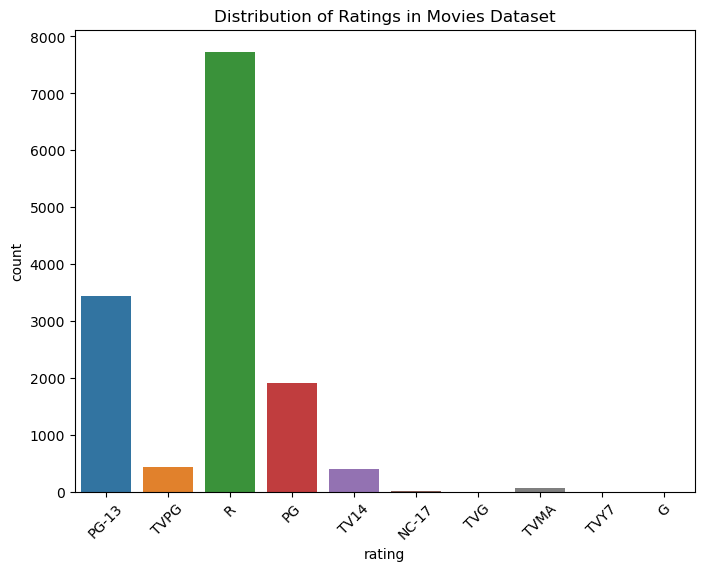

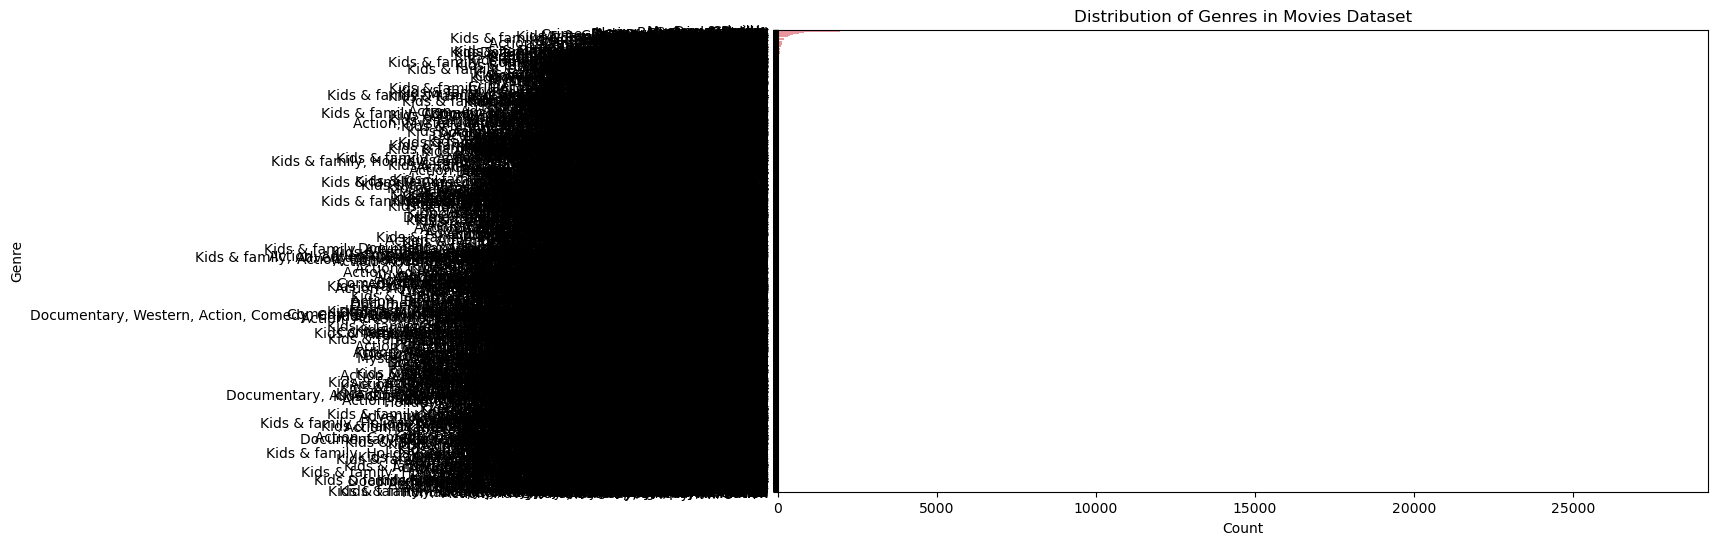

Train Dataset Statistics:
                                            movieid     reviewerName  \
count                                        162758           162758   
unique                                        16812             4482   
top     escape_the_terminator_tyler_durden_astonish  Sherri Morrison   
freq                                            708              962   

       isFrequentReviewer               reviewText sentiment  
count              162758                   156311    162758  
unique                  2                   155071         2  
top                 False  Parental Content Review  POSITIVE  
freq               113189                       29    108761  


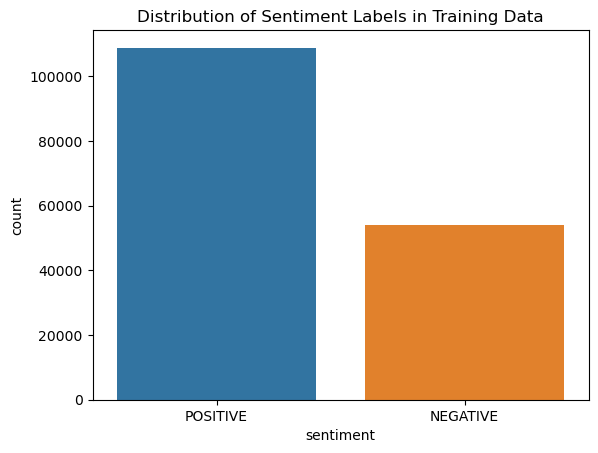

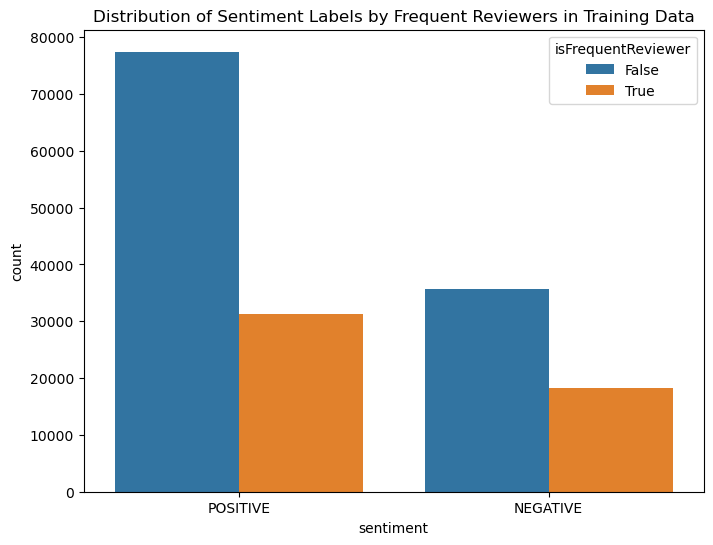

Test Dataset Statistics:
                                            movieid     reviewerName  \
count                                         55315            55315   
unique                                        16786             4495   
top     escape_the_terminator_tyler_durden_astonish  Sherri Morrison   
freq                                            230              428   

       isTopCritic               reviewText  
count        55315                    52805  
unique           2                    52686  
top          False  Parental Content Review  
freq         38428                       12  


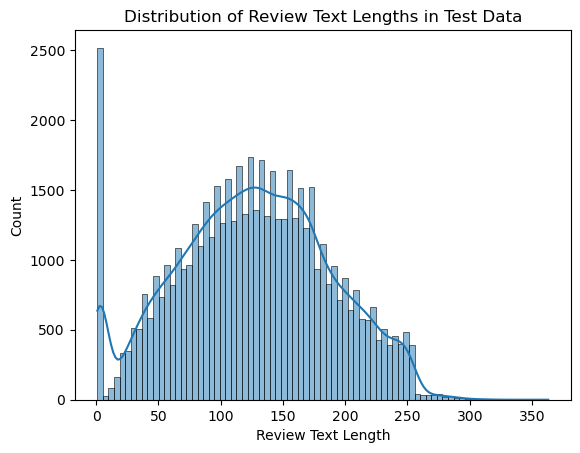

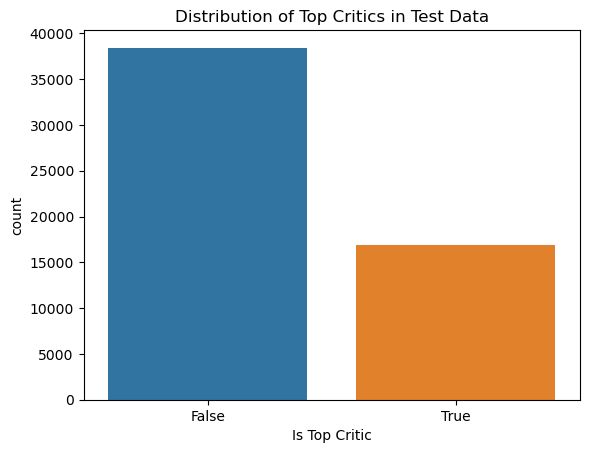

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# here firstly we are reading data from the csv files
movies = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
train_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
test_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
# here in below code we are exploring basic stats of data likedescription etc
movies_description = movies.describe(include='all')
print("Movies Dataset Statistics:")
print(movies_description)
# here we are finding distribution of various retings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=movies)
plt.title('Distribution of Ratings in Movies Dataset')
plt.xticks(rotation=45)
plt.show()
# here we are exploring  the distribution of genres in dataset(movies)
plt.figure(figsize=(12, 6))
sns.countplot(y='genre', data=movies, order=movies['genre'].value_counts().index)
plt.title('Distribution of Genres in Movies Dataset')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
# here we are exploring statistics of train dataset
train_description = train_data.describe(include='all')
print("Train Dataset Statistics:")
print(train_description)
# here we are exploring distribution of sentiment labels in the training data
sns.countplot(x='sentiment', data=train_data)
plt.title('Distribution of Sentiment Labels in Training Data')
plt.show()
# in below code we are exploring the distribution of sentiment labels which is based on isFrequentReviewer
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=train_data, hue='isFrequentReviewer')
plt.title('Distribution of Sentiment Labels by Frequent Reviewers in Training Data')
plt.show()
# here we are exploring statistics of test dataset
test_description = test_data.describe(include='all')
print("Test Dataset Statistics:")
print(test_description)
# length of review text
test_data['reviewTextLength'] = test_data['reviewText'].astype(str).apply(len)
# here we are visualizing the distribution
sns.histplot(test_data['reviewTextLength'], kde=True)
plt.title('Distribution of Review Text Lengths in Test Data')
plt.xlabel('Review Text Length')
plt.show()
# Checking the distribution of top critics 
sns.countplot(x='isTopCritic', data=test_data)
plt.title('Distribution of Top Critics in Test Data')
plt.xlabel('Is Top Critic')
plt.show()


In [3]:
# here we are Imputing missing values with mean for numeric columns in movies dataset
movies_numeric_cols = movies.select_dtypes(include=['int64', 'float64'])
movies[movies_numeric_cols.columns] = movies_numeric_cols.fillna(movies_numeric_cols.mean())
# here we are imputing missing values with mode for categorical columns in movies dataset
movies_categorical_cols = movies.select_dtypes(include=['object'])
movies[movies_categorical_cols.columns] = movies_categorical_cols.fillna(movies_categorical_cols.mode().iloc[0])
# here we are exploring basic statistics of train dataset
train_description = train_data.describe(include='all')
print("Train Dataset Statistics:")
print(train_description)
# here we are imputing missing values in 'reviewText' column of train dataset with an empty string
train_data['reviewText'].fillna('', inplace=True)
# missing values have been handled in below code
train_missing_after_imputation = train_data.isnull().sum()
print("Missing Data in Train Dataset After Imputation:")
print(train_missing_after_imputation)
# here we are Imputing missing values with mode for categorical columns in test dataset
test_data = test_data.fillna(test_data.mode().iloc[0])
# here we are Saving the cleaned and imputed datasets to new CSV files in below code 
movies.to_csv('cleaned_movies.csv', index=False)
train_data.to_csv('cleaned_train.csv', index=False)
test_data.to_csv('cleaned_test.csv', index=False)

Train Dataset Statistics:
                                            movieid     reviewerName  \
count                                        162758           162758   
unique                                        16812             4482   
top     escape_the_terminator_tyler_durden_astonish  Sherri Morrison   
freq                                            708              962   

       isFrequentReviewer               reviewText sentiment  
count              162758                   156311    162758  
unique                  2                   155071         2  
top                 False  Parental Content Review  POSITIVE  
freq               113189                       29    108761  
Missing Data in Train Dataset After Imputation:
movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
sentiment             0
dtype: int64


In [4]:
# now we are Identifying missing data in movies dataset
movies_missing = movies.isnull().sum()
print("Missing Data in Movies Dataset:")
print(movies_missing)
# now we are Identifying missing data in train dataset
train_missing = train_data.isnull().sum()
print("Missing Data in Train Dataset:")
print(train_missing)
# now we are Identifying missing data in test dataset
test_missing = test_data.isnull().sum()
print("Missing Data in Test Dataset:")
print(test_missing)


Missing Data in Movies Dataset:
movieid                 0
title                   0
audienceScore           0
rating                  0
ratingContents          0
releaseDateTheaters     0
releaseDateStreaming    0
runtimeMinutes          0
genre                   0
originalLanguage        0
director                0
boxOffice               0
distributor             0
soundType               0
dtype: int64
Missing Data in Train Dataset:
movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
sentiment             0
dtype: int64
Missing Data in Test Dataset:
movieid             0
reviewerName        0
isTopCritic         0
reviewText          0
reviewTextLength    0
dtype: int64


In [5]:
##NO numeric columns in train dataset so no preprocessing is applied to that.

In [6]:
import pandas as pd
# now we are again reading the data from CSV files
movies = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
train_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
test_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
# here is the  list of categorical columns in each dataset
categorical_columns_movies = ['rating', 'ratingContents', 'genre', 'originalLanguage', 'director', 'distributor', 'soundType']
categorical_columns_train = ['reviewerName', 'isFrequentReviewer']
categorical_columns_test = ['reviewerName', 'isTopCritic']
# now we  are Performing one-hot encoding for categorical columns
movies_encoded = pd.get_dummies(movies, columns=categorical_columns_movies, drop_first=True)
train_data_encoded = pd.get_dummies(train_data, columns=categorical_columns_train, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_columns_test, drop_first=True)

# now we are Displaying the encoded datasets
print("Encoded Movies Dataset:")
print(movies_encoded.head())

print("\nEncoded Train Dataset:")
print(train_data_encoded.head())

print("\nEncoded Test Dataset:")
print(test_data_encoded.head())


Encoded Movies Dataset:
                                             movieid  \
0                  han_solo_heroic_myth_wonder_woman   
1              voyage_tyler_durden_han_solo_stardust   
2  norman_bates_ferris_bueller_hermione_granger_v...   
3                           elegant_hermione_granger   
4                             adventure_rocky_balboa   

                                               title  audienceScore  \
0                  Han Solo Heroic Myth Wonder Woman           50.0   
1              Voyage Tyler Durden Han Solo Stardust            NaN   
2  Norman Bates Ferris Bueller Hermione Granger V...           43.0   
3                           Elegant Hermione Granger           60.0   
4                             Adventure Rocky Balboa           70.0   

  releaseDateTheaters releaseDateStreaming  runtimeMinutes boxOffice  \
0                 NaN           2018-08-25            75.0       NaN   
1                 NaN           2020-02-11           114.0       NaN

In [7]:
import pandas as pd
# now we are Reading the data from CSV files
movies = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
train_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
test_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
#now we are applying Feature engineering for text features
train_data['reviewTextLength'] = train_data['reviewText'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
test_data['reviewTextLength'] = test_data['reviewText'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
# now we are applying Feature engineering for date features
movies['releaseDateTheaters'] = pd.to_datetime(movies['releaseDateTheaters'])
movies['releaseYear'] = movies['releaseDateTheaters'].dt.year
movies['releaseMonth'] = movies['releaseDateTheaters'].dt.month
movies['releaseDay'] = movies['releaseDateTheaters'].dt.day
# now we are Displaying the updated datasets
print("Train Dataset with Engineered Features:")
print(train_data.head())
print("\nMovies Dataset with Engineered Features:")
print(movies.head())


Train Dataset with Engineered Features:
                                             movieid         reviewerName  \
0                                   marvelous_pirate       Benjamin Henry   
1          tony_montana_frodo_baggins_v_rocky_balboa        Felicia Lopez   
2  darth_vader_katniss_everdeen_sorcerer_donnie_d...  Mr. Charles Burgess   
3                                 lara_croft_glimmer         Ryan Barrett   
4  jason_bourne_surreal_the_terminator_indiana_jones     Alexander Glover   

   isFrequentReviewer                                         reviewText  \
0               False  Henry Selick’s first movie since 2009’s Corali...   
1               False  With a cast that reads like the Vogue Oscar pa...   
2                True  Creed II does not give us anything but another...   
3               False  I know what you're thinking, but this is no Li...   
4               False  Director Fernando Meirelles tells the story wi...   

  sentiment  reviewTextLength  
0  POSIT

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# now we are Loading the cleaned train data
train_data = pd.read_csv('cleaned_train.csv')
#now we are Checking for missing values in the reviewText column
missing_values = train_data['reviewText'].isnull().sum()
if missing_values > 0:
    train_data = train_data.dropna(subset=['reviewText'])
# now we are Splitting the data into features (X) and target labels (y)
X = train_data['reviewText'].str.lower()  # Convert to lowercase
y = train_data['sentiment']
# now we are Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# now we are Defining a pipeline with a TF-IDF vectorizer and logistic regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', LogisticRegression(max_iter=1000))
])
# now we are Training the model
pipeline.fit(X_train, y_train)
# now we are Making predictions on the test data
y_pred = pipeline.predict(X_test)
# now we are Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.81


In [9]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# now we are Loading the cleaned test data
test_data = pd.read_csv('cleaned_test.csv')

# now we are Extracting the reviewText from the test data
X_test = test_data['reviewText']

# now we are Loading the best hyperparameters found during tuning
best_params = {
    'tfidf__max_df': 0.75,
    'tfidf__min_df': 1,
    'model__C': 1,
    'model__max_iter': 1001
}

#now we are Defining the pipeline with the best hyperparameters
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=best_params['tfidf__max_df'], min_df=best_params['tfidf__min_df'])),
    ('model', LogisticRegression(C=best_params['model__C'], max_iter=best_params['model__max_iter']))
])

# now we are fitting the pipeline on the training data
pipeline.fit(X_train, y_train)
# now we are Using the best model to make predictions on the test data
y_pred_test = pipeline.predict(X_test)
# now we are Creating  a submission DataFrame
#submission_df = pd.DataFrame({'id': test_data['movieid'], 'sentiment': y_pred_test})
submission = pd.DataFrame({'sentiment': y_pred_test})
submission.to_csv('submission1.csv', index_label='id')



In [10]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# now we are loading the cleaned train data
train_data = pd.read_csv('cleaned_train.csv')
train_data.dropna(subset=['reviewText', 'sentiment'], inplace=True)

# here we are splitting  the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['reviewText'], train_data['sentiment'], test_size=0.2, random_state=42)

# now we are Defining a pipeline with a TF-IDF vectorizer and logistic regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.75, min_df=1, stop_words='english')),
    ('model', LogisticRegression(C=1, max_iter=1000))
])
# here we are trainning the model
pipeline.fit(X_train, y_train)
# here we are Making predictions on the validation data
y_pred_val = pipeline.predict(X_val)

#now we are Calculating accuracy on validation data
accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {accuracy:.2f}')

#now we are Loading the cleaned test data
test_data = pd.read_csv('cleaned_test.csv')

# now we are Extracting the reviewText from the test data
X_test = test_data['reviewText']

# now we are Using the trained model to make predictions on the test data
y_pred_test = pipeline.predict(X_test)
# now here we are submitting final submission
submission = pd.DataFrame({'sentiment': y_pred_test})
submission.to_csv('submission.csv', index_label='id')


Validation Accuracy: 0.80


In [11]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 5786  4362]
 [ 1845 19270]]


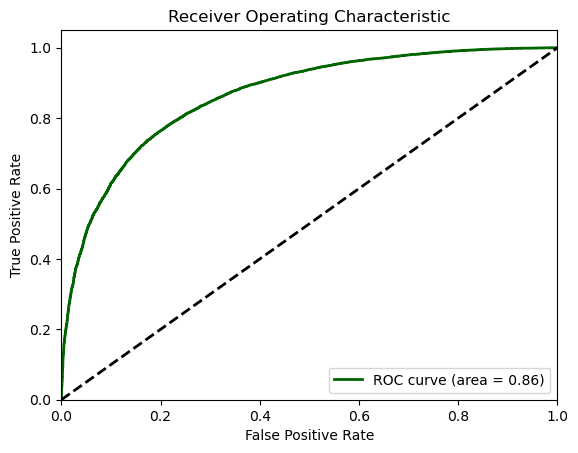

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# now ew are encoding labels into numerical values
label_encoder = LabelEncoder()
y_val_encoded = label_encoder.fit_transform(y_val)

# we are calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_val_encoded, pipeline.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

# here we are plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


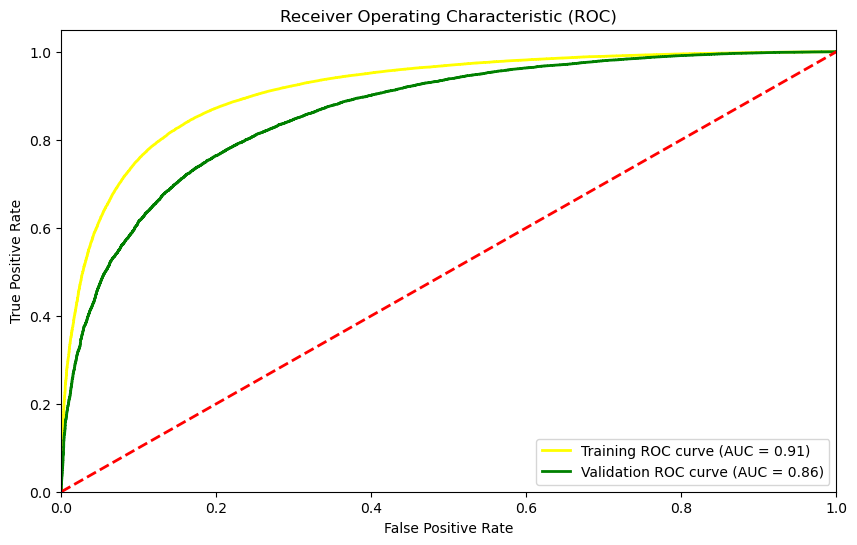

Training AUC: 0.91
Validation AUC: 0.86


In [13]:
data = pd.read_csv('cleaned_train.csv')
data.dropna(subset=['reviewText', 'sentiment'], inplace=True)  # Remove rows with NaN values
X = data['reviewText']
y = data['sentiment']
# now we are converting labels into binary
y = y.apply(lambda label: 1 if label == 'POSITIVE' else 0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.75, min_df=1, stop_words='english')),
    ('model', LogisticRegression(C=1, max_iter=1000))
])
pipeline.fit(X_train, y_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pipeline.predict_proba(X_train)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, pipeline.predict_proba(X_val)[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='yellow', lw=2, label=f'Training ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='green', lw=2, label=f'Validation ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
print(f'Training AUC: {roc_auc_train:.2f}')
print(f'Validation AUC: {roc_auc_val:.2f}')


In [14]:
#import pandas as ud
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.svm import SVC
#from sklearn.decomposition import TruncatedSVD
#movies = ud.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
#train_data = ud.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
#test_data = ud.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
#train_reviews = train_data['reviewText'].astype(str).fillna(' ')
#train_labels = train_data['sentiment']
#test_reviews = test_data['reviewText'].astype(str).fillna(' ')
#vect = TfidfVectorizer(max_features=50001)  
#train_features = vect.fit_transform(train_reviews)
#test_features = vect.transform(test_reviews)
#svd = TruncatedSVD(n_components=101)  
#train_features = svd.fit_transform(train_features)
#test_features = svd.transform(test_features)
#svm = SVC(kernel='linear') 
#svm.fit(train_features, train_labels)
#svm_predictions = svm.predict(test_features)
#svm_results = pd.DataFrame({'sentiment': svm_predictions})
#svm_results.to_csv('submission.csv', index_label='id')

In [15]:
#import pandas as ud
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
#movies = ud.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
#train_data = ud.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
#test_data = ud.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
#train_reviews = train_data['reviewText'].astype(str).fillna(' ')
#train_labels = train_data['sentiment']
#vect = TfidfVectorizer(max_features=5000)  
#train_features = vect.fit_transform(train_reviews)
#X_train, X_val, y_train, y_val = train_test_split(
#    train_features, train_labels, test_size=0.2, random_state=42
#)
#car = DecisionTreeClassifier()
#car.fit(X_train, y_train)
#val_predictions = car.predict(X_val)
#val_accuracy = accuracy_score(y_val, val_predictions)
#print("Validation Accuracy:", val_accuracy)
#test_reviews = test_data['reviewText'].astype(str).fillna(' ')
#test_features = vect.transform(test_reviews)
#test_predictions = car.predict(test_features)
#submission = ud.DataFrame({'sentiment': test_predictions})
#submission.to_csv('submission.csv', index_label='id')

In [16]:
# import pandas as ud
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# movies = ud.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
# train_data = ud.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
# test_data = ud.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
# train_reviews = train_data['reviewText'].astype(str).fillna(' ')
# train_labels = train_data['sentiment']
# vect = TfidfVectorizer(max_features=5004)  
# train_features = vect.fit_transform(train_reviews)
# X_train, X_val, y_train, y_val = train_test_split(
#     train_features, train_labels, test_size=0.2, random_state=42
# )
# base_estimator = DecisionTreeClassifier(max_depth=3)
# adaboost = AdaBoostClassifier(base_estimator=base_estimator)
# adaboost.fit(X_train, y_train)
# val_predictions = adaboost.predict(X_val)
# val_accuracy = accuracy_score(y_val, val_predictions)
# print("Validation Accuracy:", val_accuracy)
# test_reviews = test_data['reviewText'].astype(str).fillna(' ')
# test_features = vect.transform(test_reviews)
# test_predictions = adaboost.predict(test_features)
# submission = ud.DataFrame({'sentiment': test_predictions})
# submission.to_csv('submission.csv', index_label='id')

In [17]:
# import pandas as ud
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV
# movies = ud.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
# train_data = ud.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
# test_data = ud.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
# train_reviews = train_data['reviewText'].astype(str).fillna(' ')
# train_labels = train_data['sentiment']
# vect = TfidfVectorizer(max_features=5002)  
# train_features = vect.fit_transform(train_reviews)
# grb = GradientBoostingClassifier()

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.1, 0.01, 0.001]
# }

# grid_search = GridSearchCV(grb, param_grid, cv=5)
# grid_search.fit(train_features, train_labels)

# best_gb = grid_search.best_estimator_

# test_reviews = test_data['reviewText'].astype(str).fillna(' ')
# test_features = vect.transform(test_reviews)
# test_predictions = best_gb.predict(test_features)
# submission = ud.DataFrame({'sentiment': test_predictions})
# submission.to_csv('submission.csv', index_label='id')